**Linear Regression Model to Predict Heparin Dose Based on Patient Characteristics**

In [1]:
#import necessary models
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data from CSV file
data = pd.read_csv('heparin_1.csv', header =0)


In [3]:
#check the data
data.head(3)

,PatientID,Weight_kg,Age,Baseline_aPTT_sec,Target_aPTT_sec,Creatinine_mg_dL,Indication,Dose_IU
0,1,68,45,28,55,0.9,DVT,25000
1,2,82,67,31,60,1.2,PE,32000
2,3,59,72,26,50,1.5,AF,18000


In [4]:
# View datastatistics
data.describe()

,PatientID,Weight_kg,Age,Baseline_aPTT_sec,Target_aPTT_sec,Creatinine_mg_dL,Dose_IU
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,71.760000,57.640000,28.920000,57.000000,1.105400,25577.000000
std,29.011492,10.303594,8.475181,2.646438,4.322831,0.263532,5702.362704
min,1.000000,51.000000,42.000000,24.000000,50.000000,0.700000,16000.000000
25%,25.750000,64.750000,50.750000,27.000000,55.000000,0.897500,20950.000000
50%,50.500000,71.500000,57.000000,29.000000,55.000000,1.035000,25250.000000
75%,75.250000,78.250000,65.000000,31.000000,60.000000,1.282500,29875.000000
max,100.000000,95.000000,74.000000,34.000000,65.000000,1.700000,35500.000000


Text(0, 0.5, 'Dose (IU)')

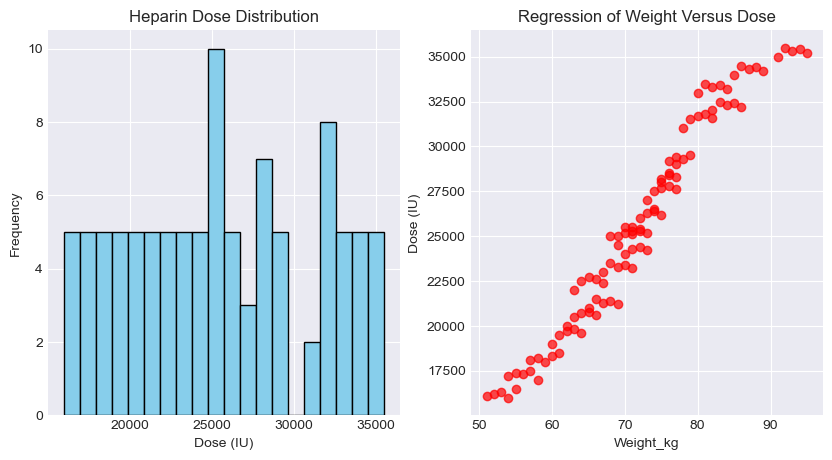

In [5]:
#visualize heparin dose destribution
#set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes =plt.subplots(1,2, figsize=(10,5))
#Heparin dose distribution
axes[0].hist(data['Dose_IU'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Heparin Dose Distribution')
axes[0].set_xlabel('Dose (IU)')
axes[0].set_ylabel('Frequency')
#Correlation of wieght to dose
axes[1].scatter(data['Weight_kg'],data['Dose_IU'], color='red', alpha=0.7 )
axes[1].set_title('Regression of Weight Versus Dose')
axes[1].set_xlabel('Weight_kg')
axes[1].set_ylabel('Dose (IU)')


In [6]:
# data Preparation
data  = pd.get_dummies(data, columns=['Indication'], drop_first=True)

data.head(3)


,PatientID,Weight_kg,Age,Baseline_aPTT_sec,Target_aPTT_sec,Creatinine_mg_dL,Dose_IU,Indication_DVT,Indication_PE
0,1,68,45,28,55,0.9,25000,True,False
1,2,82,67,31,60,1.2,32000,False,True
2,3,59,72,26,50,1.5,18000,False,False


In [7]:
#Build  a linear regression model to predict Heparin dose
X= data.drop(['PatientID', 'Dose_IU'], axis=1)
y = data['Dose_IU']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions )):.2f}")
 

R² Score: 0.98
RMSE: 770.94


In [8]:
# Percentage of  predictions within 10% of the actual dose
within_10_percent=np.sum(np.abs((y_test -predictions)<=0.10)/len(y_test))*100
print(f'Percentage of Doses within 10% of the actual: {within_10_percent:.2f}')

Percentage of Doses within 10% of the actual: 55.00


***This model is able  to predict 55% of the doses based on the patient characteristics within 10% of error from the actual dose***